## Pipeline
Pipelines are the higher level API provided by hugging face. it is super intuitive <br>
`my_pipeline = pipeline("the task I want to execute")` <br>
`result = my_pipeline(my_input)`

using T4 gpu for this task

In [ ]:
!pip install -q transformers datasets diffusers

In [ ]:
!pip install -q datasets==3.6.0

In [ ]:
## imports
import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [ ]:
## sentiment analysis
classifier = pipeline("sentiment-analysis", device="cuda") ## we can also add model as a param here to denote the model we want to use
my_input= "today the weather is so gloomy and I thought it would be a sunny day. As a plus, I dont have water supply in my apartment"
result = classifier(my_input)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


[{'label': 'NEGATIVE', 'score': 0.9855631589889526}]


In [ ]:
## named-entity-recognition
ner = pipeline("ner", grouped_entities=True, device="cuda")
my_input = "Barack Obama was the 44th president of the United States"
result = ner(my_input)
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.99917996), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9984549), 'word': 'United States', 'start': 43, 'end': 56}]


/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
for i in range(len(result)):
  print(f"-------- word {i} --------")
  print(f"{result[i]['word']}: {result[i]['score']}")

-------- word 0 --------
Barack Obama: 0.9991799592971802
-------- word 1 --------
United States: 0.9984549283981323


In [ ]:
## question-answering
qa = pipeline("question-answering", device="cuda")
context = "Barack Obama was the 44th president of the United States"
question = "Who is the 44th president of US"
result = qa(question=question, context=context)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'score': 0.9639983177185059, 'start': 0, 'end': 12, 'answer': 'Barack Obama'}


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

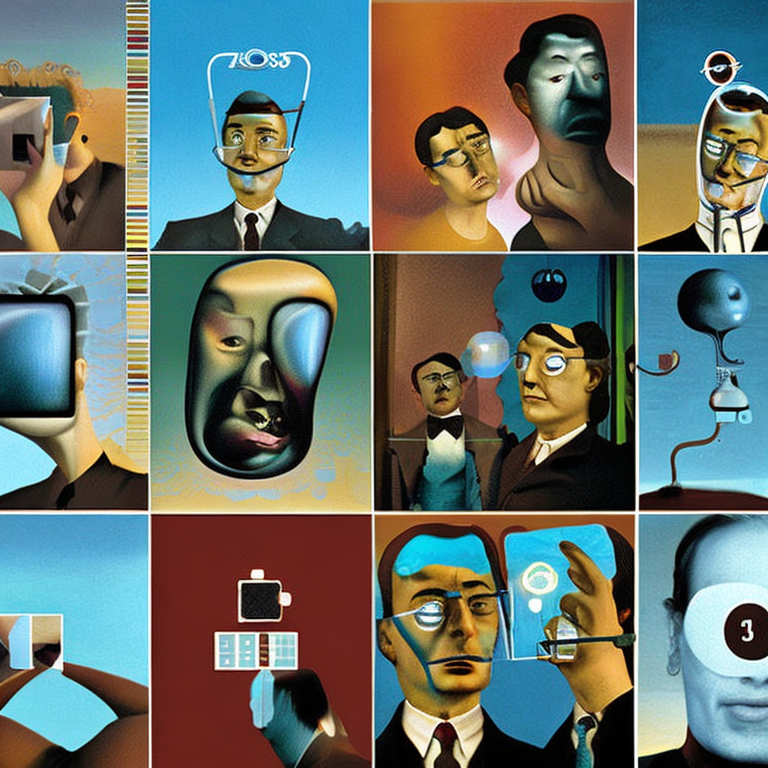

In [ ]:
## image generation
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    torch_dtype=torch.float16,
    use_safetensors = True,
    variant="fp16"
).to("cuda")

text = "a class of data scientists learning about AI, in the surreal style if Salvador Dali"
image = image_gen(prompt=text).images[0]
image